## Importar as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
pd.set_option('display.max_columns', None)

## Carregar a base tratada

In [4]:
df = pd.read_excel('df_join_final.xlsx')

In [5]:
teste = pd.read_excel('df_join_final.xlsx') 

In [6]:
df.head(1)

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_Aux,Fam_PBF_Aux,Fam_PBF_2,MapSeq_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC
0,2018,3500105,10445,9793,21389288.64,996,692,275,20,31,216,2892,362,681,14,1795,0,100,0,390,48,763,753,0,184,233,17,759,1590,6215,1864,4.030782,3.759616,-0.080826,2.989517,5.31092,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,35509879,82052356,122889808,1070909946,652715241,177742662,988857590,4,2838,4976,57,943.583333,284.916667,4.0,96.583333,NaN,284.916667,NaN,NaN,391.25,204.333333,5282,33894,5077.666667


In [7]:
df['emprego_formal'].describe()

count    1.935000e+03
mean     2.061378e+04
std      1.958894e+05
min      6.200000e+01
25%      8.825000e+02
50%      2.629000e+03
75%      9.255500e+03
max      4.981557e+06
Name: emprego_formal, dtype: float64

## Correlação macroeconomica x social

Setores com PIB em crescimento têm redução de vulnerabilidade : familias em situação de rua, % de familias com renda <= 0.5 SM
 
Setores com PIB em crescimento têm aumento de emprego formal 

IPCA do setor de alimentos × % da população em vulnerabilidade

## Análise de cluster

Agrupar municipios com padrões semelhantes de vulnerabilidade social + PIB setorial . Ex: alta industria e alta pobreza

Agrupar municipios com padrões semelhantes de emprego formal. Ex: alta industria e baixo emprego formal


In [94]:
from pathlib import Path

# Caminho do arquivo Excel
df = pd.read_excel(Path("df_join_final.xlsx"))

# Colunas principais
pop_col = 'Pop_2020'
muni_id_col = 'cod_ibge'
year_col = 'ano' if 'ano' in df.columns else None

# Função para calcular métricas por 1.000 habitantes
def per_1000(num, den):
    num = pd.to_numeric(num, errors='coerce')
    den = pd.to_numeric(den, errors='coerce')
    s = num.div(den).mul(1000)
    s[(den<=0) | (~np.isfinite(den))] = np.nan
    return s


Ideia: Calcular a razão entre o PIB industrial per capita e a renda media para medir o descolamento entre geração de riqueza e bem-estar local.

In [ ]:
 #Colunas relevantes (ajuste se tiver nomes diferentes)
pop_col = 'Pop_2020'          # população total
pib_ind_col = 'pib_industria' # PIB da indústria


# --- 1) Calcular PIB industrial per capita ---
df['pib_ind_pc'] = df[pib_ind_col] / df[pop_col]

# --- 2) Calcular renda mediana aproximada ---


##########################FIQUEI EM DUVIDA SOBRE QUAL DENOMINADOR USAR#############################################################33
#df['per_capita_massa_rendimentos'] = df['massa_rendimentos_num'] / df['Pop_2020']
df['per_capita_massa_rendimentos'] = df['massa_rendimentos_num'] / df['emprego_formal']

# --- 3) Calcular a razão PIB_industrial_per_capita / renda_media_formal ---
df['razao_pib_renda'] = df['pib_ind_pc'] / df['per_capita_massa_rendimentos']

# --- 4) Limpar valores extremos ou inválidos ---
df['razao_pib_renda'] = df['razao_pib_renda'].replace([np.inf, -np.inf], np.nan)

# --- 5) Visualizar ---
df_result = df[['cod_ibge', 'ano', 'pib_ind_pc', 'per_capita_massa_rendimentos', 'razao_pib_renda']].copy()
df_result_sorted = df_result.sort_values(by='razao_pib_renda', ascending=False)



df_result_sorted.head(100)


,cod_ibge,ano,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda
232,3520400,2018,303273.385928,2641.348492,114.817635
877,3520400,2019,309557.847027,2855.257404,108.416792
503,3544905,2018,192852.066505,2115.587146,91.157704
1522,3520400,2020,212576.800209,2989.092337,71.117509
245,3521408,2018,166226.889786,2807.902067,59.199675
...,...,...,...,...,...
652,3500709,2019,23641.777578,2389.245529,9.895081
1645,3531803,2020,29518.236656,2988.535387,9.877158
355,3531803,2018,29947.047187,3056.252032,9.798618
1424,3512001,2020,22251.015793,2287.179057,9.728585


In [76]:
#= 1,0	PIB industrial per capita está no mesmo patamar da renda média: equilíbrio
#> 1,0 (até 3)	Indústria gera mais riqueza do que se reflete nos salários: leve descolamento
#≫ 3,0	Forte descolamento: alta produção industrial sem correspondência em renda local
#< 1,0	Renda média é relativamente alta em relação ao PIB industrial (ex.: serviços, transferências, aposentadorias)

In [99]:
# Considera apenas valores válidos (não nulos)
validos = df_result['razao_pib_renda'].dropna()

# 1) Porcentagem de municípios com razão > 3
perc_maior_3 = (validos > 3).mean() * 100

# 2) Quantidade absoluta
qtd_maior_3 = (validos > 3).sum()

# 3) Média geral da razão
media_razao = validos.mean()

# 4) Exibir resultados
print(f"Média geral da razão PIB/Renda: {media_razao:.2f}")
print(f"{perc_maior_3:.2f}% dos municípios ({qtd_maior_3} no total) têm razão PIB/Renda maior que 3")


Média geral da razão PIB/Renda: 3.10
29.46% dos municípios (570 no total) têm razão PIB/Renda maior que 3


In [ ]:
# =========================================================
# Razão (PIB per capita do SETOR) / (Renda per capita) para TODOS os setores
# Gera tabela longa por setor + resumo (média e % > 3 por setor)
# =========================================================


# --- 2) Definir colunas base
pop_col = "Pop_2020"
rend_col = "massa_rendimentos_num"  # massa total de rendimentos

# --- 3) Setores disponíveis (mantém apenas os que existem no df)
setor_cols = [
    "pib_agropecuaria",
    "pib_industria",
    "pib_servicos",
    "pib_servicos_adm_publica",
    "pib_impostos_liq_sub",
    "pib",  # total
]
setor_cols = [c for c in setor_cols if c in df.columns]

# --- 4) Renda per capita (população como denominador)
df["per_capita_massa_rendimentos"] = np.where(
    df[pop_col].gt(0), df[rend_col] / df[pop_col], np.nan
)

# --- 5) PIB per capita por setor
for col in setor_cols:
    df[f"per_capita_{col}"] = np.where(
        df[pop_col].gt(0), df[col] / df[pop_col], np.nan
    )

# --- 6) Transformar para formato "longo" por setor
long_rows = []
meta_cols = [c for c in ["cod_ibge", "ano"] if c in df.columns]

for col in setor_cols:
    pc_col = f"per_capita_{col}"
    tmp = df[meta_cols + [pc_col, "per_capita_massa_rendimentos"]].copy()
    tmp = tmp.rename(
        columns={
            pc_col: "pib_setor_pc",
            "per_capita_massa_rendimentos": "renda_pc",
        }
    )
    tmp["setor"] = col.replace("pib_", "")  # nome curto do setor
    # Razão (PIB_setor per capita) / (renda per capita)
    tmp["razao_pib_renda"] = tmp["pib_setor_pc"] / tmp["renda_pc"]
    # Limpeza de infinitos
    tmp["razao_pib_renda"] = tmp["razao_pib_renda"].replace([np.inf, -np.inf], np.nan)
    long_rows.append(tmp)

df_long = pd.concat(long_rows, ignore_index=True)

# --- 7) Resumo por setor: média da razão e % de municípios com razão > 3
def resumo_setor(g):
    valid = g["razao_pib_renda"].dropna()
    return pd.Series(
        {
            "n_validos": int(valid.shape[0]),
            "media_razao": valid.mean(),
            "perc_maior_3": (valid > 3).mean() * 100 if len(valid) else np.nan,
            "qtd_maior_3": int((valid > 3).sum()),
        }
    )

resumo = df_long.groupby("setor", as_index=False).apply(resumo_setor)
resumo = resumo.sort_values("media_razao", ascending=False)

# --- 8) (Opcional) Ordenar municípios por maior razão PARA CADA SETOR
# pega top 10 por setor
tops = (
    df_long.sort_values(["setor", "razao_pib_renda"], ascending=[True, False])
    .groupby("setor")
    .head(10)
    .reset_index(drop=True)
)

# --- 9) (Opcional) Exportar resultados
df_long.to_csv("razao_setorial_por_municipio.csv", index=False, encoding="utf-8")
resumo.to_csv("resumo_razao_setorial.csv", index=False, encoding="utf-8")
tops.to_csv("top10_razao_por_setor.csv", index=False, encoding="utf-8")

# --- 10) Visualizações rápidas no console
print("\n=== RESUMO POR SETOR (ordenado pela média da razão) ===")
print(resumo)

print("\n=== TOP 10 MUNICÍPIOS POR RAZÃO (por setor) ===")
print(tops[meta_cols + ["setor", "pib_setor_pc", "renda_pc", "razao_pib_renda"]].head(30))



=== RESUMO POR SETOR (ordenado pela média da razão) ===
                  setor  n_validos  media_razao  perc_maior_3  qtd_maior_3
3                   pib     1935.0    73.421261    100.000000       1935.0
4              servicos     1935.0    29.817079    100.000000       1935.0
5  servicos_adm_publica     1935.0    12.997295     99.276486       1921.0
2             industria     1935.0    12.938290     91.162791       1764.0
0          agropecuaria     1935.0    11.745079     69.198966       1339.0
1      impostos_liq_sub     1935.0     5.923518     74.418605       1440.0

=== TOP 10 MUNICÍPIOS POR RAZÃO (por setor) ===
    cod_ibge   ano             setor   pib_setor_pc     renda_pc  \
0    3510906  2020      agropecuaria   73469.290982   378.759683   
1    3532868  2019      agropecuaria   16998.814626   101.752764   
2    3510906  2019      agropecuaria   48557.027255   362.014934   
3    3510906  2018      agropecuaria   39486.713427   316.415114   
4    3533809  2020      agrop

C:\Users\marcos\AppData\Local\Temp\ipykernel_25168\2709284783.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resumo = df_long.groupby("setor", as_index=False).apply(resumo_setor)


## Analisar impacto 

Presença de BPC × envelhecimento populacional

## Exploração inicial

In [8]:
df.Pop_2020.describe()

count    1.935000e+03
mean     6.920915e+04
std      4.799387e+05
min      8.120000e+02
25%      5.534000e+03
50%      1.331900e+04
75%      4.107300e+04
max      1.186966e+07
Name: Pop_2020, dtype: float64

In [9]:
df.query('localidade == "São Paulo"')

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_Aux,Fam_PBF_Aux,Fam_PBF_2,MapSeq_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC
562,2018,3550308,4903449,4739122,1.929714e+10,751229,2433,242890,35428,23674,191303,863463,226721,219788,6837,334124,1489,175645,640,119552,23338,357033,875122,70,200394,252276,6566,296602,582769,2415123,1602389,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,São Paulo,36419777,127157037150,58064987762,714663604042,485395448600,44009710753,587506566893,30853,2436563,3134152,"77,7",1.345828e+06,490938.583333,3.000000,438560.666667,NaN,490938.583333,NaN,NaN,80141.916667,126148.333333,1259189,11869660,1.133041e+06
1207,2019,3550308,4981557,4602207,1.968816e+10,764179,2274,246555,31351,24154,201985,852812,233209,222046,5598,320850,1103,191178,665,113835,25393,356113,895303,89,245008,247857,9250,281978,553032,2522557,1614740,6.364091,-0.377431,1.081717,4.669742,4.757728,3.895636,5.410017,3.582840,0.738737,4.306040,São Paulo,41807827,132475060795,57130706301,763597807913,528404124837,45546108154,631122747118,33292,2484011,3322612,"74,8",1.208909e+06,451383.833333,3.166667,446026.333333,NaN,451383.833333,NaN,NaN,81394.166667,126805.916667,1259189,11869660,1.132383e+06
1852,2020,3550308,4845415,4419505,1.964615e+10,733423,2482,190227,27324,24509,207530,807254,252604,207339,5685,304853,1048,192818,610,105021,26316,373600,927672,47,220563,234490,9173,259843,500902,2484392,1591105,14.113456,5.996319,3.428847,1.021320,1.134802,5.274873,1.501329,1.031892,-1.113577,4.517342,São Paulo,61896381,124349145812,58077783601,748759006965,520357968893,45912212278,624409861153,33443,2519988,3252133,"77,5",1.250882e+06,458208.250000,3.250000,471573.000000,NaN,458208.250000,NaN,NaN,79810.000000,127839.666667,1259189,11869660,1.131349e+06


In [10]:
df.describe()

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_Aux,Fam_PBF_Aux,Fam_PBF_2,MapSeq_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC
count,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.0000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1.935000e+03,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1935.000000,1935.000000,1935.000000,0.0,1935.000000,0.0,0.0,1935.000000,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03
mean,2019.000000,3.528698e+06,2.061378e+04,1.926917e+04,6.739725e+07,2449.996899,483.264599,886.192765,118.890956,76.570026,606.273385,4064.047545,853.805685,857.201550,42.824806,3387.266667,25.547804,514.706460,1.099742,449.963307,143.303876,1257.204134,2659.5323,0.609302,578.796382,1156.682171,41.489406,1494.934367,2691.390698,1.140431e+04,4.981660e+03,8.169443,3.126168,1.476579,2.893526,3.734483,4.631566,3.621013,2.939067,0.075746,4.189621,5.637394e+07,5.651583e+08,6.248683e+08,3.584775e+09,2.047208e+09,2.911660e+08,3.019616e+09,89.275452,1.304564e+04,1.646221e+04,7.024334e+03,2377.584582,3.307407,2201.798234,NaN,2377.584582,NaN,NaN,535.449096,618.596038,7.153194e+03,6.920915e+04,6.534598e+03
std,0.816708,1.669169e+04,1.958894e+05,1.830493e+05,7.763601e+08,29542.198118,804.940076,9122.893916,1257.500132,957.073154,7974.992842,33875.286455,9469.913411,8745.542433,377.566239,14238.867121,130.333494,7453.455974,25.530481,4504.608807,1057.588456,14428.422048,35788.3897,4.132915,8815.318997,10165.523097,337.174961,11186.882352,21886.218807,9.926816e+04,6.348914e+04,4.310758,2.641025,1.460146,1.491393,1.852552,0.567014,1.613173,1.372451,0.843045,0.325770,7.933725e+07,5.199311e+09,2.741503e+09,3.000122e+10,2.052037e+10,1.836205e+09,2.481601e+10,1285.585812,9.930021e+04,1.293093e+05,5.105567e+04,18708.764663,0.685114,18105.952532,NaN,18708.764663,NaN,NaN,3249.757547,5074.143969,5.073399e+04,4.799387e+05,4.568199e+04
min,2018.000000,3.500105e+06,6.200000e+01,5.900000e+01,1.196612e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,3.200000e+01,6.000000e+00,4.030782,-0.377431,-0.080826,1.021320,1.134802,3.895636,1.501329,1.031892,-1.113577,3.745482,0.000000e+00,6.448200e+04,1.103229e+06,2.998864e+07,8.538175e+06,8.331779e+06,2.905904e+0

In [11]:
df = df.drop(columns = ['Fam_Aux',"Fam_PBF_2","MapSeq_Aux"])

### Participação de cada setor no emprego formal

In [12]:
emprego_cols = ['qtd_formal_Administração_Pública','qtd_formal_Agropecuária','qtd_formal_Alojamento_e_Alimentação','qtd_formal_Artes_e_Cultura','qtd_formal_Atividades_Imobiliárias','qtd_formal_Atividades_Profissionais_e_Técnicas','qtd_formal_Comércio','qtd_formal_Construção','qtd_formal_Educação','qtd_formal_Eletricidade_e_Gás','qtd_formal_Indústria_de_Transformação','qtd_formal_Indústrias_Extrativas','qtd_formal_Informação_e_Comunicação','qtd_formal_Organismos_Internacionais','qtd_formal_Outros_Serviços','qtd_formal_Saneamento_e_Resíduos','qtd_formal_Saúde','qtd_formal_Serviços_Administrativos','qtd_formal_Serviços_Domésticos','qtd_formal_Serviços_Financeiros','qtd_formal_Transporte_e_Correios',
                'qtd_formal_escolaridade_0','qtd_formal_escolaridade_1','qtd_formal_escolaridade_2','qtd_formal_escolaridade_3','qtd_formal_escolaridade_4']

for col in emprego_cols:
    df['taxa_' + col] = df[col] / df['emprego_formal']

In [13]:
df

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_PBF_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4
0,2018,3500105,10445,9793,21389288.64,996,692,275,20,31,216,2892,362,681,14,1795,0,100,0,390,48,763,753,0,184,233,17,759,1590,6215,1864,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,35509879,82052356,122889808,1070909946,652715241,177742662,988857590,4,2838,4976,57,943.583333,284.916667,4.0,96.583333,284.916667,391.250000,204.333333,5282,33894,5077.666667,0.095357,0.066252,0.026328,0.001915,0.002968,0.020680,0.276879,0.034658,0.065199,0.001340,0.171853,0.000000,0.009574,0.0,0.037338,0.004596,0.073049,0.072092,0.0,0.017616,0.022307,0.001628,0.072666,0.152226,0.595022,0.178459
1,2018,3500204,854,828,1628663.10,309,318,2,9,0,2,66,21,0,0,8,32,0,0,54,3,1,18,0,3,8,8,228,168,312,138,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,22647055,3135155,10942193,92202519,33284014,22194101,89067364,1,1091,1742,"62,6",508.666667,162.583333,3.0,140.000000,162.583333,20.166667,20.583333,521,3447,500.416667,0.361827,0.372365,0.002342,0.010539,0.000000,0.002342,0.077283,0.024590,0.000000,0.000000,0.009368,0.037471,0.000000,0.0,0.063232,0.003513,0.001171,0.021077,0.0,0.003513,0.009368,0.009368,0.266979,0.196721,0.365340,0.161593
2,2018,3500303,6984,6791,16726576.00,855,1343,133,27,9,46,1365,123,87,5,2155,94,19,0,73,4,46,83,0,82,435,18,730,1637,3429,1170,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Aguaí,81936180,118450794,291296056,972612902,352924948,128004924,854162108,4,8628,10494,"82,2",4739.000000,1367.333333,3.0,849.333333,1367.333333,339.333333,186.500000,3527,35608,3340.500000,0.122423,0.192297,0.019044,0.003866,0.001289,0.006586,0.195447,0.017612,0.012457,0.000716,0.308562,0.013459,0.002721,0.0,0.010452,0.000573,0.00

### Transformar para PIB e massa_rendimentos per capita

In [14]:
cols_pib = ['pib_agropecuaria','pib_impostos_liq_sub','pib_industria','pib','pib_servicos','pib_servicos_adm_publica','pib_valor_add']

for col in cols_pib:
    df['per_capita_' + col] = df[col] / df['Pop_2020']

In [15]:
df['per_capita_massa_rendimentos'] = df['massa_rendimentos_num'] / df['Pop_2020']

### Transformas as colunas oriundas do cadunico

In [16]:
# Transformar contagens absolutas em proporções:

cols_1 = ['n_fam_rua', 'pes_rf_ate_meio_sm','pes_insc_cadun', 'Pes_PBF','PCD_BPC', 'Ido_BPC', 'Pop_65_mais', '65_menos_Idoso_BPC']

for col in cols_1:
    df['perc_' + col] = df[col] / df['Pop_2020']


In [17]:
df

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_PBF_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib_agropecuaria,per_capita_pib_impostos_liq_sub,per_capita_pib_industria,per_capita_pib,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_valor_add,per_capita_massa_rendimentos,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC
0,2018,3500105,10445,9793,21389288.64,996,692,275,20,31,216,2892,362,681,14,1795,0,100,0,390,48,763,753,0,184,233,17,759,1590,6215,1864,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,35509879,82052356,122889808,1070909946,652715241,177742662,988857590,4,2838,4976,57,943.583333,284.916667,4.0,96.583333,284.916667,391.250000,204.333333,5282,33894,5077.666667,0.095357,0.066252,0.026328,0.001915,0.002968,0.020680,0.276879,0.034658,0.065199,0.001340,0.171853,0.000000,0.009574,0.0,0.037338,0.004596,0.073049,0.072092,0.0,0.017616,0.022307,0.001628,0.072666,0.152226,0.595022,0.178459,1047.674485,2420.851950,3625.709801,31595.856081,19257.545318,5244.074526,29175.004131,631.064160,0.000118,0.083732,0.146811,0.027839,0.011543,0.006029,0.155839,0.149810
1,2018,3500204,854,828,1628663.10,309,318,2,9,0,2,66,21,0,0,8,32,0,0,54,3,1,18,0,3,8,8,228,168,312,138,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,22647055,3135155,10942193,92202519,33284014,22194101,89067364,1,1091,1742,"62,6",508.666667,162.583333,3.0,140.000000,162.583333,20.166667,20.583333,521,3447,500.416667,0.361827,0.372365,0.002342,0.010539,0.000000,0.002342,0.077283,0.024590,0.000000,0.000000,0.009368,0.037471,0.000000,0.0,0.063232,0.003513,0.001171,0.021077,0.0,0.003513,0.009368,0.009368,0.266979,0.196721,0.365340,0.161593,6570.076878,909.531477,3174.4

In [18]:
# Transformas as colunas em proprções sobre familias cadastradas no cadunico

cols_2 = ['Fam_PBF','F_CAD_EP'] 

for col in cols_2:
    df['perc_cadunico' + col] = df[col] / df['pes_insc_cadun']

In [19]:
df

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_PBF_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib_agropecuaria,per_capita_pib_impostos_liq_sub,per_capita_pib_industria,per_capita_pib,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_valor_add,per_capita_massa_rendimentos,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,2018,3500105,10445,9793,21389288.64,996,692,275,20,31,216,2892,362,681,14,1795,0,100,0,390,48,763,753,0,184,233,17,759,1590,6215,1864,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,35509879,82052356,122889808,1070909946,652715241,177742662,988857590,4,2838,4976,57,943.583333,284.916667,4.0,96.583333,284.916667,391.250000,204.333333,5282,33894,5077.666667,0.095357,0.066252,0.026328,0.001915,0.002968,0.020680,0.276879,0.034658,0.065199,0.001340,0.171853,0.000000,0.009574,0.0,0.037338,0.004596,0.073049,0.072092,0.0,0.017616,0.022307,0.001628,0.072666,0.152226,0.595022,0.178459,1047.674485,2420.851950,3625.709801,31595.856081,19257.545318,5244.074526,29175.004131,631.064160,0.000118,0.083732,0.146811,0.027839,0.011543,0.006029,0.155839,0.149810,0.057258,0.019410
1,2018,3500204,854,828,1628663.10,309,318,2,9,0,2,66,21,0,0,8,32,0,0,54,3,1,18,0,3,8,8,228,168,312,138,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,22647055,3135155,10942193,92202519,33284014,22194101,89067364,1,1091,1742,"62,6",508.666667,162.583333,3.0,140.000000,162.583333,20.166667,20.583333,521,3447,500.416667,0.361827,0.372365,0.002342,0.010539,0.000000,0.002342,0.077283,0.024590,0.000000,0.000000,0.009368,0.037471,0.000000,0.0,0.063232,0.003513,0.001171,0.021077,0.0,0.003513,0.009368,0.009368,0.26

## Tentar verificar algumas correlações

In [20]:
df_pad = df.drop(columns = emprego_cols + cols_pib + ['massa_rendimentos_num'] + cols_1 + cols_2)

In [21]:
df_pad

,ano,cod_ibge,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,perc_rf_ate_meio_sm,MapSeq,Fam_PBF_Aux,Pop_2020,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib_agropecuaria,per_capita_pib_impostos_liq_sub,per_capita_pib_industria,per_capita_pib,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_valor_add,per_capita_massa_rendimentos,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,2018,3500105,10445,9793,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,57,4.0,284.916667,33894,0.095357,0.066252,0.026328,0.001915,0.002968,0.020680,0.276879,0.034658,0.065199,0.001340,0.171853,0.000000,0.009574,0.0,0.037338,0.004596,0.073049,0.072092,0.0,0.017616,0.022307,0.001628,0.072666,0.152226,0.595022,0.178459,1047.674485,2420.851950,3625.709801,31595.856081,19257.545318,5244.074526,29175.004131,631.064160,0.000118,0.083732,0.146811,0.027839,0.011543,0.006029,0.155839,0.149810,0.057258,0.019410
1,2018,3500204,854,828,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,"62,6",3.0,162.583333,3447,0.361827,0.372365,0.002342,0.010539,0.000000,0.002342,0.077283,0.024590,0.000000,0.000000,0.009368,0.037471,0.000000,0.0,0.063232,0.003513,0.001171,0.021077,0.0,0.003513,0.009368,0.009368,0.266979,0.196721,0.365340,0.161593,6570.076878,909.531477,3174.410502,26748.627502,9655.936757,6438.671598,25839.096026,472.487119,0.000290,0.316507,0.505367,0.147568,0.005850,0.005971,0.151146,0.145175,0.093331,0.080367
2,2018,3500303,6984,6791,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Aguaí,"82,2",3.0,1367.333333,35608,0.122423,0.192297,0.019044,0.003866,0.001289,0.006586,0.195447,0.017612,0.012457,0.000716,0.308562,0.013459,0.002721,0.0,0.010452,0.000573,0.006586,0.011884,0.0,0.011741,0.062285,0.002577,0.104525,0.234393,0.490979,0.167526,2301.060998,3326.521961,8180.635138,27314.449056,9911.394855,3594.836104,23987.927095,469.742080,0.000112,0.242305,0.294709,0.133088,0.009530,0.005238,0.099051,0.093813,0.130297,0.080935
3,2018,3500402,983,957,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Águas da Prata,71,4.0,154.583333,7797,0.285860,0.209563,0.029502,0.001017,0.000000,0.006104,0.166836,0.030519,0.002035,0.000000,0.159715,0.000000,0.007121,0.0,0.031536,0.012208,0.019329,0.004069,0.0,0.021363,0.013225,0.003052,0.158698,0.183113,0.441506,0.213632,1280.548288,1804.531999,2445.247018,21388.169552,11650.968065,4206.874311,19583.637681,258.840391,0.000385,0.170835,0.240734,0.073180,0.006423,0.009854,0.158523,0.148668,0.082357,0.056873
4,2018,3500501,4605,4476,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Águas de Lindóia,"78,8",4.0,289.416667,18374,0.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
cols_to_standardize = [
    'emprego_formal', 'emp_c_sal',
    'per_capita_pib_agropecuaria', 'per_capita_pib_impostos_liq_sub',
    'per_capita_pib_industria', 'per_capita_pib', 'per_capita_pib_servicos',
    'per_capita_pib_servicos_adm_publica', 'per_capita_pib_valor_add',
    'per_capita_massa_rendimentos',
    'ipca_alimentos_bebidas', 'ipca_artigos_residencia', 'ipca_comunicacao',
    'ipca_despesas_pessoais', 'ipca_educacao', 'ipca_habitacao',
    'ipca_saude_cuidados_pessoais', 'ipca_transportes', 'ipca_vestuario', 'ipca_geral'
]

cols_taxas_emprego = [c for c in df.columns if c.startswith('taxa_qtd_formal')]

cols_percentuais = [c for c in df.columns if c.startswith('perc_')]

all_cols_to_standardize = cols_to_standardize + cols_taxas_emprego + cols_percentuais

df_scaled = df_pad.copy()

scaler = StandardScaler()

df_scaled[all_cols_to_standardize] = (
    df_scaled[all_cols_to_standardize]
    .replace(',', '.', regex=True)
)
df_scaled[all_cols_to_standardize] = scaler.fit_transform(df_scaled[all_cols_to_standardize])

In [24]:
df_scaled

,ano,cod_ibge,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,perc_rf_ate_meio_sm,MapSeq,Fam_PBF_Aux,Pop_2020,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib_agropecuaria,per_capita_pib_impostos_liq_sub,per_capita_pib_industria,per_capita_pib,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_valor_add,per_capita_massa_rendimentos,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,2018,3500105,-0.051924,-0.051782,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,Adamantina,-2.468669,4.0,284.916667,33894,-0.916665,-0.558849,-0.037473,-0.204327,0.605893,0.540344,1.372533,0.393468,2.174818,-0.133366,-0.227282,-0.333363,0.288809,-0.038938,1.126045,-0.079310,1.279158,0.614787,-0.138774,0.360904,-0.364154,-0.434936,-0.864141,-0.366664,0.811963,0.246565,-0.647643,-0.212667,-0.243847,-0.132493,0.277740,0.210519,-0.110493,0.273347,-0.575042,-1.677173,-1.388657,-1.635908,0.310570,-0.353514,1.443558,1.496825,-1.972119,-1.894690
1,2018,3500204,-0.100898,-0.100770,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,Adolfo,-1.826138,3.0,162.583333,3447,0.655428,1.709924,-0.704413,1.150712,-0.499620,-0.602867,-1.228820,0.052038,-0.739170,-0.308989,-1.167231,2.557226,-0.524592,-0.038938,2.573233,-0.167901,-0.714040,-0.190378,-0.138774,-0.324712,-0.730826,1.698423,1.890907,0.433963,-1.813256,-0.103956,0.444342,-0.454863,-0.268501,-0.270414,-0.364791,1.180906,-0.221203,-0.128670,-0.198205,0.713828,1.550794,0.303089,-0.936514,-0.366100,1.272488,1.328440,-1.011575,-0.718731
2,2018,3500303,-0.069597,-0.068186,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,Aguaí,0.422721,3.0,1367.333333,35608,-0.756983,0.375338,-0.240027,0.102257,-0.019611,-0.338254,0.311218,-0.184628,-0.182415,-0.215184,0.563562,0.704925,-0.293459,-0.038938,-0.376618,-0.408494,-0.563866,-0.335471,-0.138774,0.075297,0.768706,-0.173163,-0.412440,1.111806,-0.377218,0.019353,-0.399802,-0.067529,0.004987,-0.254314,-0.347696,-1.129180,-0.282639,-0.135630,-0.587481,-0.048353,-0.176183,0.068589,-0.130543,-0.527496,-0.626544,-0.537209,-0.027279,-0.707778
3,2018,3500402,-0.100239,-0.100065,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,Águas da Prata,-0.862341,4.0,154.583333,7797,0.207245,0.503304,0.050756,-0.345348,-0.499620,-0.368348,-0.061667,0.253102,-0.648236,-0.308989,-0.297495,-0.333363,0.080411,-0.038938,0.801752,0.543584,-0.210526,-0.458818,-0.138774,0.543065,-0.621526,-0.042362,0.355651,0.189100,-0.942693,0.977555,-0.601595,-0.311435,-0.308335,-0.422939,-0.231285,-0.632013,-0.428806,-0.670298,0.009068,-0.782474,-0.618675,-0.901620,-0.811011,0.487923,1.541388,1.455347,-1.303808,-1.171978
4,2018,3500501,-0.081745,-0.080836,-0.

In [25]:
df_num = df_scaled.select_dtypes(include=['float64', 'int64'])
df_num

,ano,cod_ibge,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,perc_rf_ate_meio_sm,MapSeq,Fam_PBF_Aux,Pop_2020,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib_agropecuaria,per_capita_pib_impostos_liq_sub,per_capita_pib_industria,per_capita_pib,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_valor_add,per_capita_massa_rendimentos,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,2018,3500105,-0.051924,-0.051782,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,-2.468669,4.0,284.916667,33894,-0.916665,-0.558849,-0.037473,-0.204327,0.605893,0.540344,1.372533,0.393468,2.174818,-0.133366,-0.227282,-0.333363,0.288809,-0.038938,1.126045,-0.079310,1.279158,0.614787,-0.138774,0.360904,-0.364154,-0.434936,-0.864141,-0.366664,0.811963,0.246565,-0.647643,-0.212667,-0.243847,-0.132493,0.277740,0.210519,-0.110493,0.273347,-0.575042,-1.677173,-1.388657,-1.635908,0.310570,-0.353514,1.443558,1.496825,-1.972119,-1.894690
1,2018,3500204,-0.100898,-0.100770,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,-1.826138,3.0,162.583333,3447,0.655428,1.709924,-0.704413,1.150712,-0.499620,-0.602867,-1.228820,0.052038,-0.739170,-0.308989,-1.167231,2.557226,-0.524592,-0.038938,2.573233,-0.167901,-0.714040,-0.190378,-0.138774,-0.324712,-0.730826,1.698423,1.890907,0.433963,-1.813256,-0.103956,0.444342,-0.454863,-0.268501,-0.270414,-0.364791,1.180906,-0.221203,-0.128670,-0.198205,0.713828,1.550794,0.303089,-0.936514,-0.366100,1.272488,1.328440,-1.011575,-0.718731
2,2018,3500303,-0.069597,-0.068186,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,0.422721,3.0,1367.333333,35608,-0.756983,0.375338,-0.240027,0.102257,-0.019611,-0.338254,0.311218,-0.184628,-0.182415,-0.215184,0.563562,0.704925,-0.293459,-0.038938,-0.376618,-0.408494,-0.563866,-0.335471,-0.138774,0.075297,0.768706,-0.173163,-0.412440,1.111806,-0.377218,0.019353,-0.399802,-0.067529,0.004987,-0.254314,-0.347696,-1.129180,-0.282639,-0.135630,-0.587481,-0.048353,-0.176183,0.068589,-0.130543,-0.527496,-0.626544,-0.537209,-0.027279,-0.707778
3,2018,3500402,-0.100239,-0.100065,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,-0.862341,4.0,154.583333,7797,0.207245,0.503304,0.050756,-0.345348,-0.499620,-0.368348,-0.061667,0.253102,-0.648236,-0.308989,-0.297495,-0.333363,0.080411,-0.038938,0.801752,0.543584,-0.210526,-0.458818,-0.138774,0.543065,-0.621526,-0.042362,0.355651,0.189100,-0.942693,0.977555,-0.601595,-0.311435,-0.308335,-0.422939,-0.231285,-0.632013,-0.428806,-0.670298,0.009068,-0.782474,-0.618675,-0.901620,-0.811011,0.487923,1.541388,1.455347,-1.303808,-1.171978
4,2018,3500501,-0.081745,-0.080836,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.1633

In [26]:
corr_matrix = df_num.drop(columns = 'cod_ibge').corr(method='pearson')
corr_matrix

,ano,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,perc_rf_ate_meio_sm,MapSeq,Fam_PBF_Aux,Pop_2020,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib_agropecuaria,per_capita_pib_impostos_liq_sub,per_capita_pib_industria,per_capita_pib,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_valor_add,per_capita_massa_rendimentos,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
ano,1.000000e+00,0.000009,-0.002297,9.551216e-01,3.458377e-01,9.815375e-01,-5.389058e-01,-9.205322e-01,3.965934e-01,-6.202782e-01,-9.433614e-01,-8.310285e-01,9.675288e-01,-0.000290,0.025566,-0.000211,2.912363e-15,-0.008565,-0.007193,-0.038600,-0.008250,0.019646,0.004566,0.000281,-0.008371,-0.020090,0.024851,0.009522,-0.002759,0.022984,-0.034930,-0.022519,0.007328,0.019862,0.020598,-0.052476,-0.004468,0.021048,0.024214,-0.088108,-0.106519,0.132093,0.010170,0.097989,0.033029,0.030982,0.068960,0.057102,0.244907,0.073592,0.014963,0.128843,0.007204,0.004024,-0.042956,-0.026789,0.011879,-3.650006e-15,-0.001962,-0.039167,0.111367
emprego_formal,9.346827e-06,1.000000,0.999681,-1.468731e-04,-4.902849e-04,-9.142846e-05,4.380247e-04,1.968760e-04,-4.791333e-04,4.067660e-04,1.656830e-04,2.847944e-04,1.419886e-04,-0.000997,0.025132,0.993050,9.947497e-01,-0.081896,-0.092220,0.044820,0.042214,0.093047,0.114171,0.035098,0.065553,0.117825,-0.003872,-0.028510,-0.025026,0.168074,0.285436,0.027281,0.011948,0.099439,0.159282,-0.004881,0.091523,0.062500,-0.034608,-0.091175,-0.079624,0.035196,0.164224,-0.076669,0.104870,0.008628,0.069742,0.140548,-0.059957,0.059627,0.176808,0.265269,-0.067888,-0.070485,-0.052993,-0.062990,0.033200,-4.361346e-02,-0.048942,0.030613,0.029449
emp_c_sal,-2.297302e-03,0.999681,1.000000,-2.177568e-03,-7.417993e-04,-2.244147e-03,1.190723e-03,2.092801e-03,-8.595406e-04,1.380916e-03,2.148554e-03,1.877886e-03,-2.236901e-03,-0.000938,0.025149,0.993576,9.944752e-01,-0.081880,-0.092159,0.045012,0.042374,0.092966,0.113821,0.035336,0.065397,0.118007,-0.003993,-0.028355,-0.025074,0.167582,0.286434,0.027259,0.011882,0.099401,0.158733,-0.004823,0.091329,0.062246,-0.034766,-0.091103,-0.079239,0.034976,0.164086,-0.076646,0.104519,0.008629,0.069391,0.139909,-0.060535,0.059291,0.176195,0.264526,-0.068020,-0.070626,-0.053009,-0.062977,0.033114,-4.360729e-02,-0.048922,0.030744,0.029142
ipca_alimentos_bebidas,9.551216e-01,-0.000147,-0.002178,1.000000e+00,6.082529e-01,9.941445e-01,-7.642411e-01,-9.949411e-01,6.507176e-01,-8.247860e-01,-9.992988e-01,-9.584963e-01,8.492365e-01,0.026939,0.022417,0.000342,-1.071910e-16,-0.009388,-0.006908,-0.045496,-0.008310,0.015371,0.005505,0.000034,-0.000064,-0.018813,0.026273,0.010019,0.000608,0.025740,-0.027537,-0.023328,0.002796,0.018781,0.023501,-0.041866,-0.006487,0.017687,0.006976,-0.085370,-0.099564,0.127276,0.008183,0.109406,0.029558,0.033040,0.069601,0.052936,0.25

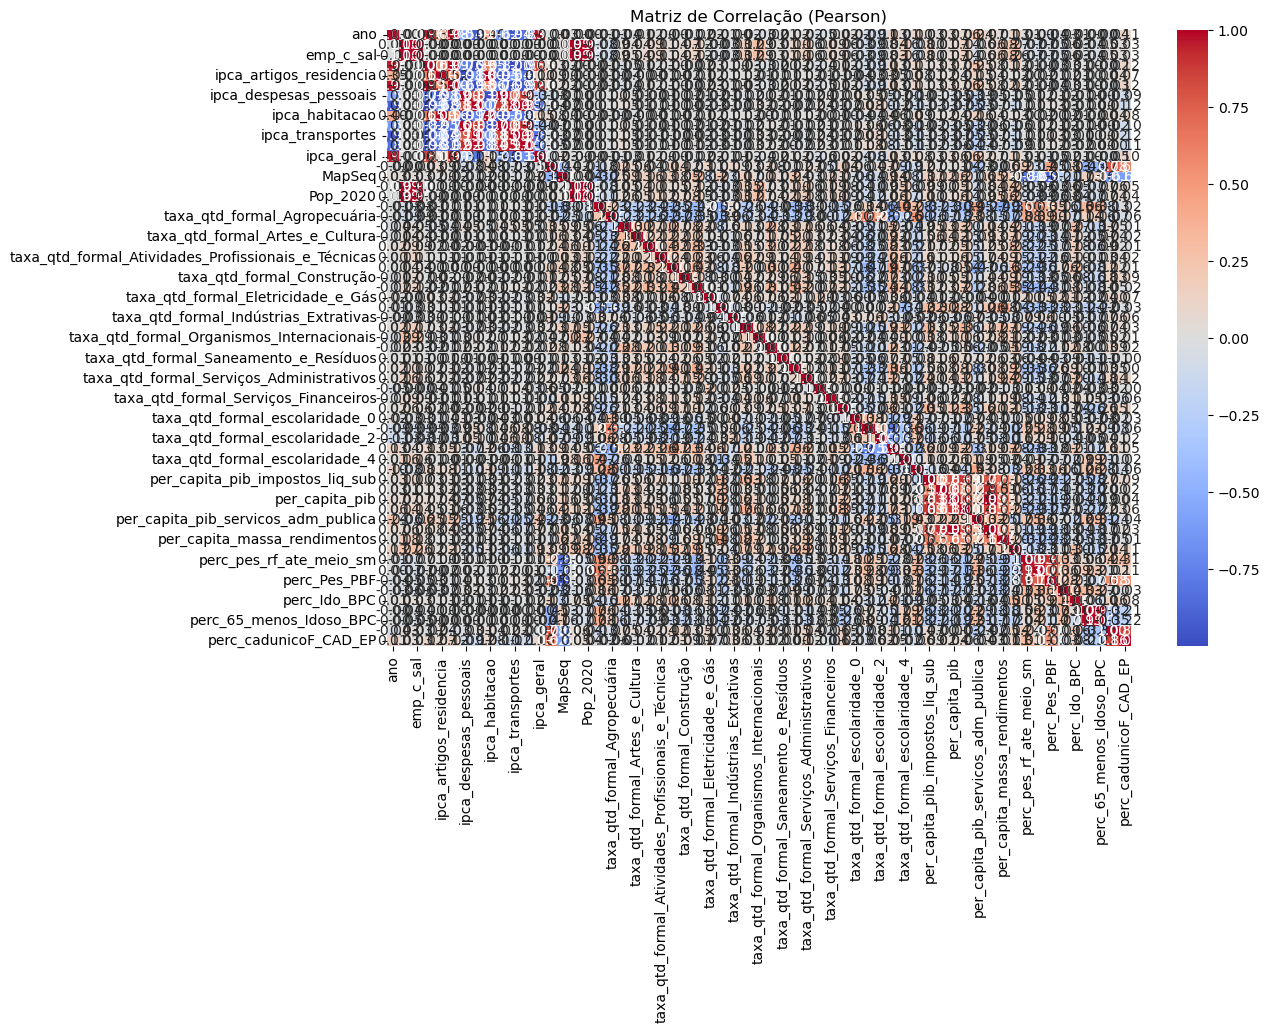

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação (Pearson)")
plt.show()

In [28]:
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
# Remove autocorrelação (valor de 1)
corr_pairs = corr_pairs[corr_pairs != 1]


In [29]:
pd.set_option('display.max_rows', 50)

In [30]:
corr_pairs.drop_duplicates().head(50)

emp_c_sal                        emprego_formal                           0.999681
ipca_habitacao                   ipca_artigos_residencia                  0.998506
ipca_educacao                    ipca_transportes                         0.998005
Pop_2020                         Fam_PBF_Aux                              0.995196
ipca_despesas_pessoais           ipca_saude_cuidados_pessoais             0.995008
emprego_formal                   Pop_2020                                 0.994750
emp_c_sal                        Pop_2020                                 0.994475
ipca_comunicacao                 ipca_alimentos_bebidas                   0.994144
Fam_PBF_Aux                      emp_c_sal                                0.993576
per_capita_pib_valor_add         per_capita_pib                           0.993480
emprego_formal                   Fam_PBF_Aux                              0.993050
perc_Pop_65_mais                 perc_65_menos_Idoso_BPC                  0.986321
ipca

In [31]:
# emp_c_sal                              Fam_PBF_Aux
#emprego_formal                         Fam_PBF_Aux
#Pop_2020                               Fam_PBF_Aux
# taxa_qtd_formal_escolaridade_1         taxa_qtd_formal_Agropecuária       0.618473
#taxa_qtd_formal_Administração_Pública  perc_pes_insc_cadun                0.588429


In [32]:
# taxa_qtd_formal_escolaridade_3              taxa_qtd_formal_Agropecuária                 -0.544501
